### Name:N D V Hareesh
### Roll No:214102310
### Real Time Face Detection and Recognition

#### Imports 

In [1]:
import cv2

import seaborn as sns

import numpy as np

import matplotlib
from matplotlib import pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#### Haar Face and Eye Classifier to detect eyes and faces in input image

In [2]:
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier=cv2.CascadeClassifier('haarcascade_eye.xml')

#### Function to get Cropped image(face section); only if 2 eyes were detected along with face otherwise discard that Image

In [3]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

#### Path to Cropped images folder and Input Images folder

In [4]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"

#### Getting individual person folders path in Input Images folder

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/Milan',
 './images_dataset/Aditya',
 './images_dataset/lionel_messi',
 './images_dataset/cropped',
 './images_dataset/Bhargav',
 './images_dataset/Hareesh']

___________________________________________________________________________________________________

In [6]:
### if Cropping is not required  execute this box by making this cell to code cell
img_dirs1=[]
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs1.append(entry.path)
img_dirs1
file_names_dict = {}
for img_dir in img_dirs1:
    name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    file_names_dict[name] = file_list
file_names_dict

{'Milan': ['./images_dataset/cropped/Milan/Milan10.png',
  './images_dataset/cropped/Milan/Milan5.png',
  './images_dataset/cropped/Milan/Milan4.png',
  './images_dataset/cropped/Milan/Milan11.png',
  './images_dataset/cropped/Milan/Milan13.png',
  './images_dataset/cropped/Milan/Milan6.png',
  './images_dataset/cropped/Milan/Milan7.png',
  './images_dataset/cropped/Milan/Milan12.png',
  './images_dataset/cropped/Milan/Milan16.png',
  './images_dataset/cropped/Milan/Milan3.png',
  './images_dataset/cropped/Milan/Milan2.png',
  './images_dataset/cropped/Milan/Milan17.png',
  './images_dataset/cropped/Milan/Milan15.png',
  './images_dataset/cropped/Milan/Milan1.png',
  './images_dataset/cropped/Milan/Milan14.png',
  './images_dataset/cropped/Milan/Milan9.png',
  './images_dataset/cropped/Milan/Milan8.png'],
 'Aditya': ['./images_dataset/cropped/Aditya/Aditya8.png',
  './images_dataset/cropped/Aditya/Aditya9.png',
  './images_dataset/cropped/Aditya/Aditya41.png',
  './images_dataset/cropp

--------------------------------------------------------------------------------------------------------------------

#### Image cropping to get train ,test data

In [91]:
#after this again run img_dirs{below markdown} module to remove cropped folder  in img_dirs
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)

#### Getting individual person folders path in Input Images folder

In [92]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/Milan',
 './images_dataset/Aditya',
 './images_dataset/lionel_messi',
 './images_dataset/Bhargav',
 './images_dataset/Hareesh']

#### Getting individual person folders path in Cropped Images folder

In [93]:
cropped_image_dirs = []
file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    file_names_dict[name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped/Milan
Generating cropped images in folder:  ./images_dataset/cropped/Aditya
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/Bhargav
Generating cropped images in folder:  ./images_dataset/cropped/Hareesh


In [94]:
file_names_dict = {}
for img_dir in cropped_image_dirs:
    name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    file_names_dict[name] = file_list
file_names_dict

{'Milan': ['./images_dataset/cropped/Milan/Milan10.png',
  './images_dataset/cropped/Milan/Milan5.png',
  './images_dataset/cropped/Milan/Milan4.png',
  './images_dataset/cropped/Milan/Milan11.png',
  './images_dataset/cropped/Milan/Milan13.png',
  './images_dataset/cropped/Milan/Milan6.png',
  './images_dataset/cropped/Milan/Milan7.png',
  './images_dataset/cropped/Milan/Milan12.png',
  './images_dataset/cropped/Milan/Milan16.png',
  './images_dataset/cropped/Milan/Milan3.png',
  './images_dataset/cropped/Milan/Milan2.png',
  './images_dataset/cropped/Milan/Milan17.png',
  './images_dataset/cropped/Milan/Milan15.png',
  './images_dataset/cropped/Milan/Milan1.png',
  './images_dataset/cropped/Milan/Milan14.png',
  './images_dataset/cropped/Milan/Milan9.png',
  './images_dataset/cropped/Milan/Milan8.png'],
 'Aditya': ['./images_dataset/cropped/Aditya/Aditya8.png',
  './images_dataset/cropped/Aditya/Aditya9.png',
  './images_dataset/cropped/Aditya/Aditya41.png',
  './images_dataset/cropp

______________________________________________________________________________________________________________

### Skip to this if  cropping already performed

#### Creating a dictionary of persons we are going to recognise

In [7]:
class_dict = {}
count = 0
for name in file_names_dict.keys():
    class_dict[name] = count
    count = count + 1
class_dict

{'Milan': 0, 'Aditya': 1, 'lionel_messi': 2, 'Bhargav': 3, 'Hareesh': 4}

#### Wavelet transform

In [38]:

import pywt
def w2d(img, mode='haar', level=5):
    imArr = img
    #convert to grayscale
    imArr = cv2.cvtColor( imArr,cv2.COLOR_BGR2GRAY )
    #convert to float
    imArr =  np.float32(imArr)   
    imArr /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArr, mode, level=level)
    #Process Coefficients to get features from image
    coeffs_H=list(coeffs) 
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArr_H=pywt.waverec2(coeffs_H, mode);
    imArr_H *= 255;
    imArr_H =  np.uint8(imArr_H)

    return imArr_H


#### Resized Cropped Image $(32*32*3-->32*32*3,1)$  and Resized wavelet tranform Image ${(32*32-->32*32, 1)} $  are Stacked and converted to array  {size: $ (4096 ,1 )$}

In [9]:
X, y = [], []
for name, training_files in file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har =w2d(img,'haar',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)#combined_img
        y.append(class_dict[name])

In [10]:
X[0].shape
#each input feature length

(4096, 1)

In [29]:
#no.of inputs 185 here
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(185, 4096)

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [13]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)
#Accuracy for svc
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9361702127659575

In [14]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      1.00      1.00        11
           2       0.75      0.86      0.80         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15

    accuracy                           0.94        47
   macro avg       0.88      0.87      0.87        47
weighted avg       0.93      0.94      0.93        47



In [15]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Creating a dictionary to perform gridsearch to get best hyperparamters

In [16]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5]
        }
    },
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'kneighborsclassifier__n_neighbors':[5,10],
            'kneighborsclassifier__weights':['uniform','distance'],
            'kneighborsclassifier__metric':['euclidean']
        }
    },
}

### Best hyperparameters for different algorithms and their scores

In [17]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print("Best hyperparameters and Best scores using Grid Search")
df

Best hyperparameters and Best scores using Grid Search


,model,best_score,best_params
0,svm,0.956614,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.898677,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.970899,{'logisticregression__C': 5}
3,KNeighborsClassifier,0.920106,"{'kneighborsclassifier__metric': 'euclidean', ..."


### Scores for different algorithms

In [18]:
print('Accuracy on test data using SVM')
best_estimators['svm'].score(X_test,y_test)

Accuracy on test data using SVM


0.9361702127659575

In [19]:
print('Accuracy on test data using random_forest')
best_estimators['random_forest'].score(X_test,y_test)

Accuracy on test data using random_forest


0.851063829787234

In [20]:
print('Accuracy on test data using logistic_regression')
best_estimators['logistic_regression'].score(X_test,y_test)

Accuracy on test data using logistic_regression


0.8936170212765957

In [21]:
print('Accuracy on test data using KNeighborsClassifier')
best_estimators['KNeighborsClassifier'].score(X_test,y_test)

Accuracy on test data using KNeighborsClassifier


0.9361702127659575

###  Confusion matrix of Different algorithms

Text(0.5, 1.0, 'KNN')

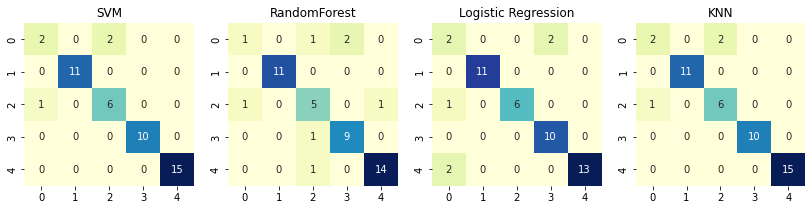

In [22]:
Best_clf_SVM = best_estimators['svm']
clf_LR=best_estimators['logistic_regression']
clf_RF=best_estimators['random_forest']
clf_KNN=best_estimators['KNeighborsClassifier']

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, Best_clf_SVM.predict(X_test))
cm_LR=confusion_matrix(y_test, clf_LR.predict(X_test))
cm_RF=confusion_matrix(y_test,clf_RF.predict(X_test))
cm_KNN=confusion_matrix(y_test,clf_KNN.predict(X_test))

f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(14,3))
sns.heatmap(cm_SVM,cmap="YlGnBu",cbar=False,ax=ax1,annot=True)
ax1.set_title("SVM")
sns.heatmap(cm_RF,cmap="YlGnBu",cbar=False,ax=ax2,annot=True)
ax2.set_title("RandomForest")
sns.heatmap(cm_LR,cmap="YlGnBu",cbar=False,ax=ax3,annot=True)
ax3.set_title("Logistic Regression")
sns.heatmap(cm_KNN,cmap="YlGnBu",cbar=False,ax=ax4,annot=True)
ax4.set_title("KNN")


#### It is clear that SVM,  performs well on both test and train data. 
#### I have chosen SVM algorithm to implement classification of Face in Real time

### Face Recognition from file location

Stacked array(cropped Image and Wavelet Transformed Image stacked into 1D Array) [[242. 247. 255. ...  30.   4.   4.]]


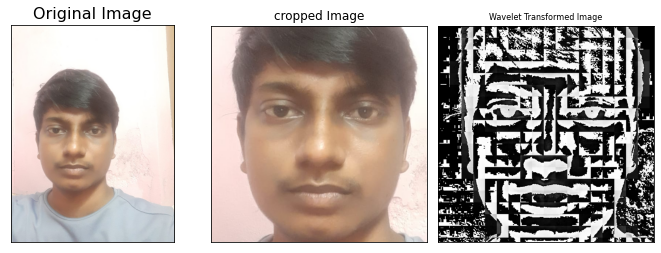

In [52]:
input_path= './downloads/ndv1.jpeg' 
img1=cv2.imread(input_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#plt.imshow(img1)
#preprocessing on image
img_cropped1=get_cropped_image_if_2_eyes(input_path)
img_cropped_rgb = cv2.cvtColor(img_cropped1, cv2.COLOR_BGR2RGB)
scalled_raw_img1 = cv2.resize(img_cropped1, (32, 32))
img_har1 =w2d(img_cropped1,'haar',5)
#plt.imshow(img_har1,cmap='gray')
scalled_img_har1 = cv2.resize(img_har1, (32, 32))
combined_img1 = np.vstack((scalled_raw_img1.reshape(32*32*3,1),scalled_img_har1.reshape(32*32,1)))
X1=[]
X1.append(combined_img1)
X1=np.array(X1).reshape(len(X1),4096).astype(float)

fig, ax = plt.subplots(1, 3,figsize=(12, 4), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img1)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_cropped_rgb)
ax[1].set_title('cropped Image', size=12)
ax[2].imshow(img_har1,cmap='gray')
ax[2].set_title('Wavelet Transformed Image', size=8)
print("Stacked array(cropped Image and Wavelet Transformed Image stacked into 1D Array)",X1)



In [51]:
m=best_estimators['svm'].predict(X1)
m1=best_estimators['svm'].predict_proba(X1)
#print('Probability of Prediciton:',(m1.max()*100))
Pred_value=m[0]
#getting name of person from label
for Name in class_dict.keys(): 
    if(class_dict.get(Name)==Pred_value):
        Pred_Name=Name
print('Predicted Person Name:',Pred_Name) 

Predicted Person Name: Bhargav


 ###  Face Recognition using webcam
 #### Run the below cell to turn on webcam for Face recognition

In [ ]:
cap = cv2.VideoCapture(0) #webcam

while True:
    ret,frame = cap.read()
    if ret == False:
        continue
    faces = face_classifier.detectMultiScale(frame,1.3,5)
    if(len(faces)==0):
        continue
    for face in faces:
        x,y,w,h = face
        #Get the face ROI and preprocessing on Live image
        offset = 10
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(32,32))
        img_har_live =w2d(face_section,'haar',5)
        scalled_img_har_live = cv2.resize(img_har_live, (32, 32))
        combined_img_live = np.vstack((face_section.reshape(32*32*3,1),scalled_img_har_live.reshape(32*32,1)))
        X_live=[]
        X_live.append(combined_img_live)
        X_live=np.array(X_live).reshape(len(X_live),4096).astype(float)
        X_live
        #prediction on live image
        m_live=best_estimators['svm'].predict(X_live)
        m_problive=best_estimators['svm'].predict_proba(X_live)
        Pred_prob_live=round(m_problive.max()*100,2)
        Pred_prob_live_string = str(Pred_prob_live)
        Pred_value_live=m_live[0]
        for Name_live in class_dict.keys(): 
            if(class_dict.get(Name_live)==Pred_value_live):
                Pred_Name_live=Name_live
        #placing prediction name, probability on live webfeed
        cv2.putText(frame,Pred_Name_live,(x,y-10),cv2.FONT_ITALIC,1,(255,255,0),2,cv2.LINE_AA)
        cv2.putText(frame,Pred_prob_live_string,(x,y-30),cv2.FONT_ITALIC,1,(255,255,0),2,cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

    cv2.imshow("Faces",frame)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Screenshot from Webcam

Text(0.5, 1.0, 'Screenshot Of Output')

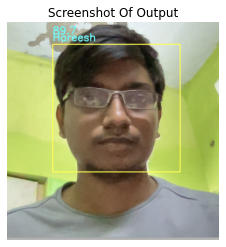

In [33]:
Path_for_Screenshot_of_output_faceDetected= './Desktop/Output.png' 
img_output_screenshot=cv2.imread(Path_for_Screenshot_of_output_faceDetected)
img_output_screenshot = cv2.cvtColor(img_output_screenshot, cv2.COLOR_BGR2RGB)
plt.imshow(img_output_screenshot)
plt.axis('off')
plt.title("Screenshot Of Output")

END

In [27]:
import joblib
joblib.dump(Best_clf_SVM,'Face_joblib')

['Face_joblib']